## Cosine Similarity

In [1]:
import pandas as pd

In [4]:
# Binary dataset
# Shows whether a function exists in any ingredient (0 or 1)
df_binary = pd.read_csv('skincare_dataset_binary.csv')


In [5]:
# Print info about dataset
print("BINARY DATASET:")
print(f"Columns ({len(df_binary.columns)}):")
print(df_binary.columns.tolist())
print("\nFirst row example:")
print(df_binary.iloc[0])

BINARY DATASET:
Columns (28):
['product_brand', 'product_title', 'predicted_category', 'abrasive_scrub_binary', 'absorbent_mattifier_binary', 'anti-acne_binary', 'antimicrobial_antibacterial_binary', 'antioxidant_binary', 'astringent_binary', 'buffering_binary', 'cell-communicating_ingredient_binary', 'chelating_binary', 'colorant_binary', 'deodorant_binary', 'emollient_binary', 'emulsifying_binary', 'emulsion_stabilising_binary', 'exfoliant_binary', 'moisturizer_humectant_binary', 'perfuming_binary', 'preservative_binary', 'skin_brightening_binary', 'skin-identical_ingredient_binary', 'solvent_binary', 'soothing_binary', 'sunscreen_binary', 'surfactant_cleansing_binary', 'viscosity_controlling_binary']

First row example:
product_brand                           The Skin Shark
product_title                           Clearing Serum
predicted_category                          Face Serum
abrasive_scrub_binary                                0
absorbent_mattifier_binary                     

In [6]:
df_binary.head()

,product_brand,product_title,predicted_category,abrasive_scrub_binary,absorbent_mattifier_binary,anti-acne_binary,antimicrobial_antibacterial_binary,antioxidant_binary,astringent_binary,buffering_binary,...,moisturizer_humectant_binary,perfuming_binary,preservative_binary,skin_brightening_binary,skin-identical_ingredient_binary,solvent_binary,soothing_binary,sunscreen_binary,surfactant_cleansing_binary,viscosity_controlling_binary
0,The Skin Shark,Clearing Serum,Face Serum,0,0,0,0,1,0,1,...,0,1,1,0,1,1,1,0,0,1
1,The Skin Shark,Spot Treatment,Acne Treatment,0,0,0,0,1,0,1,...,0,1,1,0,1,1,1,0,0,1
2,C9 Beauty,Face Cream,Face Moisturizer,0,0,0,0,1,0,0,...,0,1,1,0,1,1,1,0,0,1
3,Le-kku,CBD Day Cream,Face Moisturizer,0,0,0,0,1,0,1,...,0,0,1,0,1,1,1,0,0,1
4,Le-kku,CBD Face Serum,Face Serum,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0


In [19]:
# understanding the data structure
df_binary.info()
df_binary.describe()
df_binary['predicted_category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   product_brand                         1100 non-null   object
 1   product_title                         1100 non-null   object
 2   predicted_category                    1100 non-null   object
 3   abrasive_scrub_binary                 1100 non-null   int64 
 4   absorbent_mattifier_binary            1100 non-null   int64 
 5   anti-acne_binary                      1100 non-null   int64 
 6   antimicrobial_antibacterial_binary    1100 non-null   int64 
 7   antioxidant_binary                    1100 non-null   int64 
 8   astringent_binary                     1100 non-null   int64 
 9   buffering_binary                      1100 non-null   int64 
 10  cell-communicating_ingredient_binary  1100 non-null   int64 
 11  chelating_binary              

predicted_category
Face Moisturizer         308
Face Serum               299
Sunscreen                203
Face Mask                 74
Shampoo                   47
Brightening Treatment     42
Face Cleanser             33
Conditioner               21
Acne Treatment            20
Face Toner                16
Exfoliant/Scrub           15
Body Moisturizer          14
Hair Treatment             3
Uncategorized              2
Body Wash                  2
Deodorant                  1
Name: count, dtype: int64

<Axes: xlabel='num_functions', ylabel='Count'>

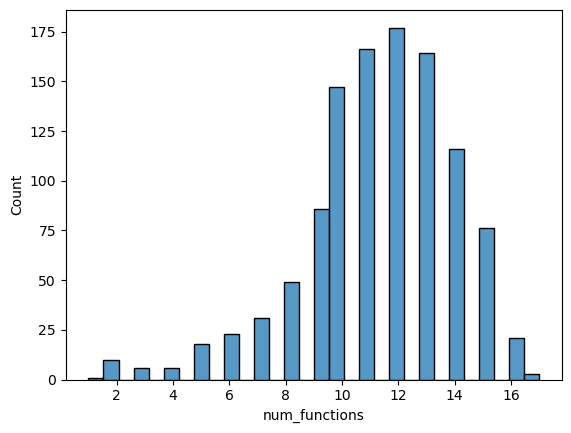

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# number of functionalities per product
df_binary['num_functions'] = df_binary.iloc[:, 3:].sum(axis=1)
sns.histplot(df_binary['num_functions'], bins=30)

<Axes: title={'center': 'Functionality Frequency'}>

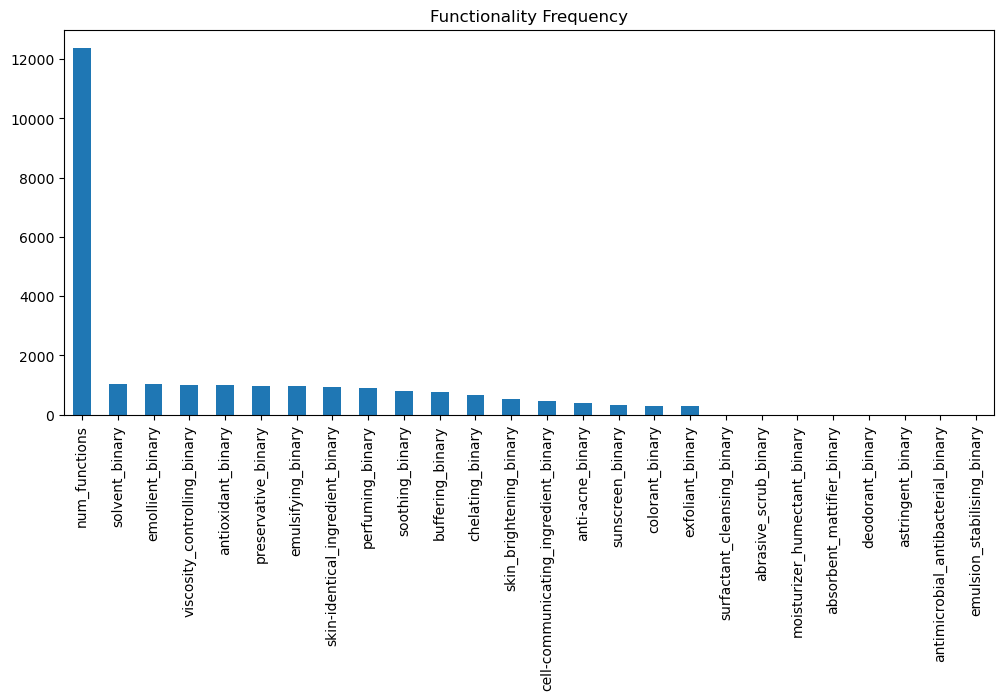

In [21]:
# Common functionalities across all products
func_freq = df_binary.iloc[:, 3:].sum().sort_values(ascending=False)
func_freq.plot(kind='bar',
               figsize=(12,5),
               title='Functionality Frequency')

In [23]:
# Showing similar products function
def show_similar_products(title, top_n=5):
    sims = cosine_similarity_df[title].sort_values(ascending=False)[1:top_n+1]
    return sims

show_similar_products("Face Cream")


product_title
Face Cream                                          1.0
Gerontol                                            1.0
Intensive Moisture Care Wrinkle Moisture Essence    1.0
Intense Hydration Eye Cream                         1.0
Scalp Serum                                         1.0
Name: Face Cream, dtype: float64

In [28]:
# Excludng non-binary columns (like title, brand, category)
binary_cols = df_binary.columns[3:]  # first 3 columns
binary_data = df_binary[binary_cols]


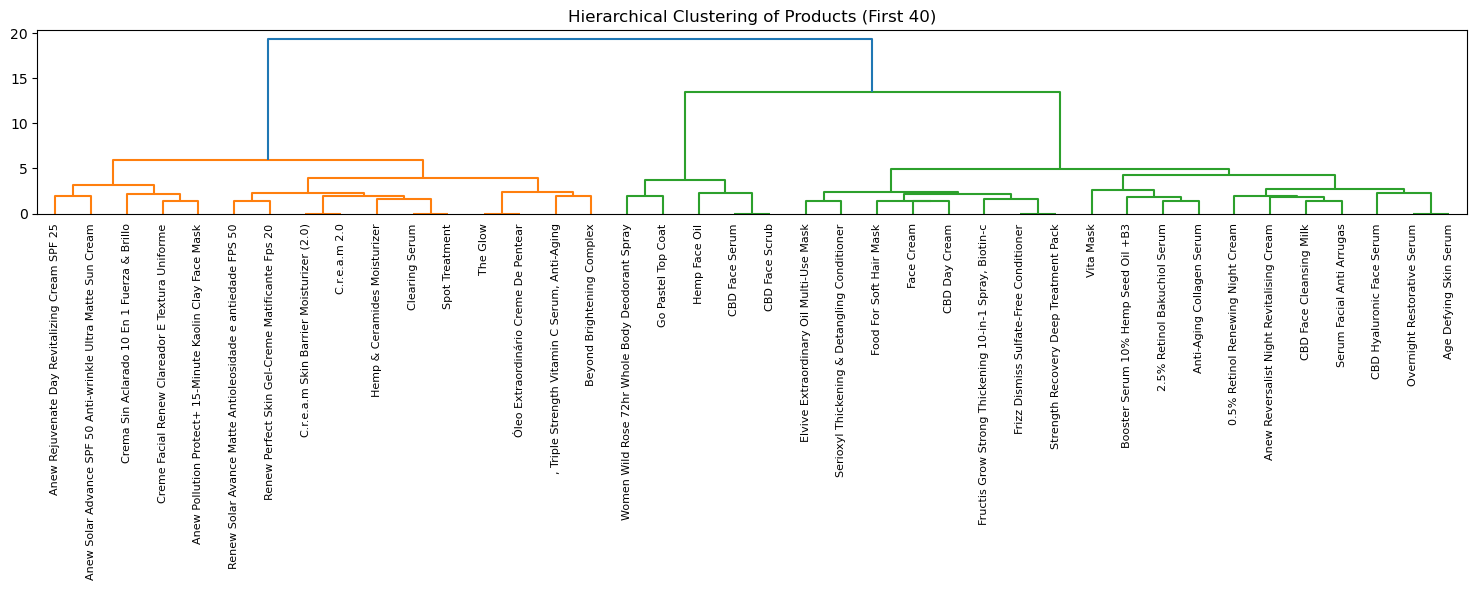

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Select a smaller sample (first 40 products)
subset_binary = binary_data.iloc[:40]
subset_titles = df_binary['product_title'].iloc[:40]

# Perform hierarchical clustering
linkage_matrix = linkage(subset_binary, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels=subset_titles.values)
plt.title('Hierarchical Clustering of Products (First 40)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


# Excludng non-binary columns (like title, brand, category)
binary_cols = df_binary.columns[3:]  # first 3 columns
binary_data = df_binary[binary_cols]

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(binary_data)

# Convert to a DataFrame for readability
cosine_similarity_df = pd.DataFrame(similarity_matrix, index=df_binary['product_title'], columns=df_binary['product_title'])


In [35]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, metric='cosine', random_state=42)
tsne_results = tsne.fit_transform(binary_data)

# Add to your original dataframe
df_binary['tsne_1'] = tsne_results[:, 0]
df_binary['tsne_2'] = tsne_results[:, 1]


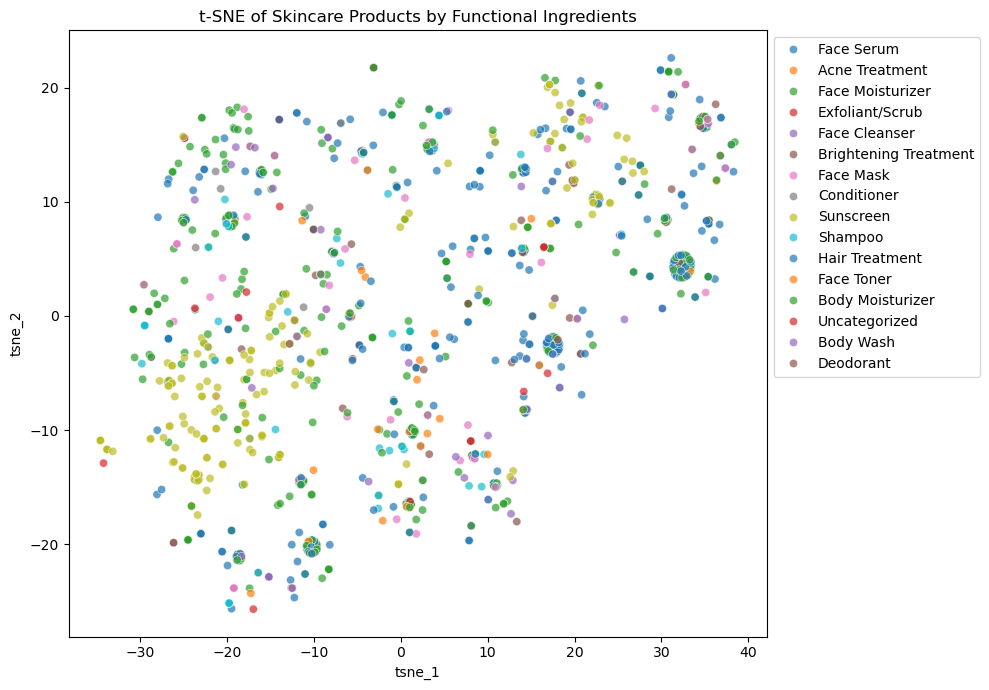

In [36]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='predicted_category',
    palette='tab10',
    data=df_binary,
    alpha=0.7
)
plt.title('t-SNE of Skincare Products by Functional Ingredients')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


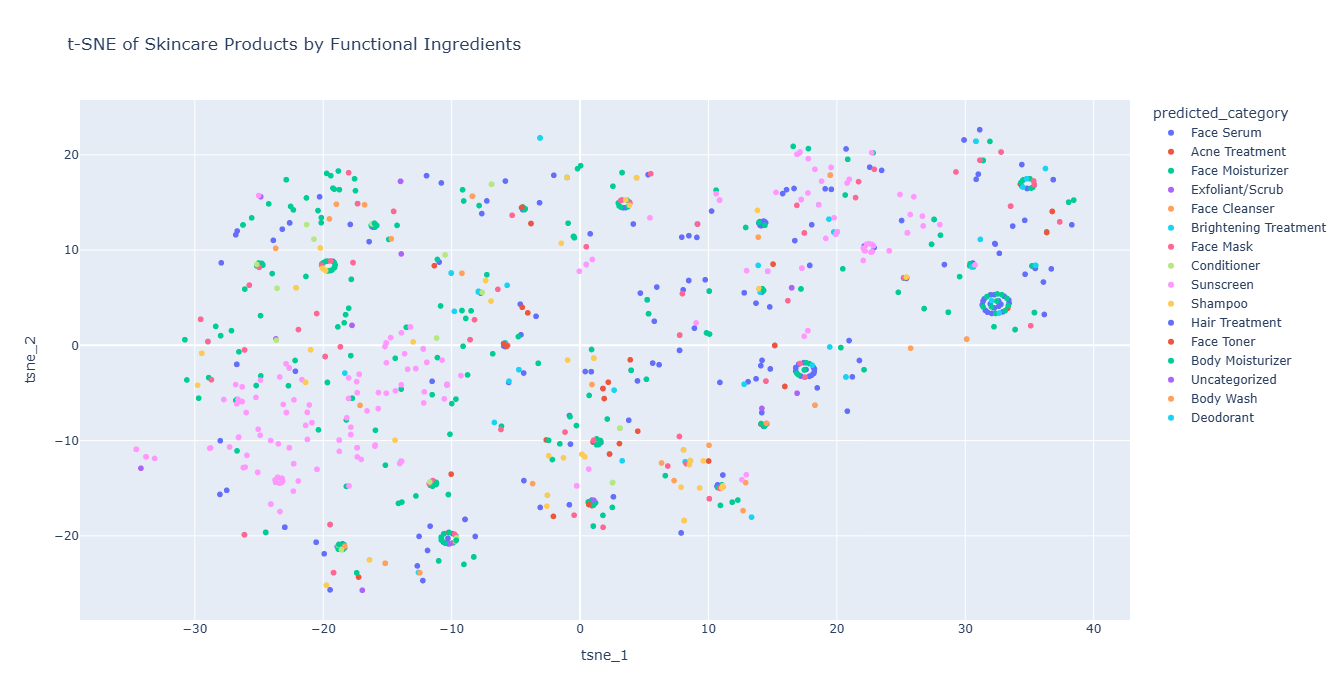

In [38]:
import plotly.express as px

fig = px.scatter(
    df_binary,
    x='tsne_1',
    y='tsne_2',
    color='predicted_category',  # Color by category
    hover_name='product_title',  # Hover shows product title
    title='t-SNE of Skincare Products by Functional Ingredients',
    width=1000,
    height=700
)

fig.show()


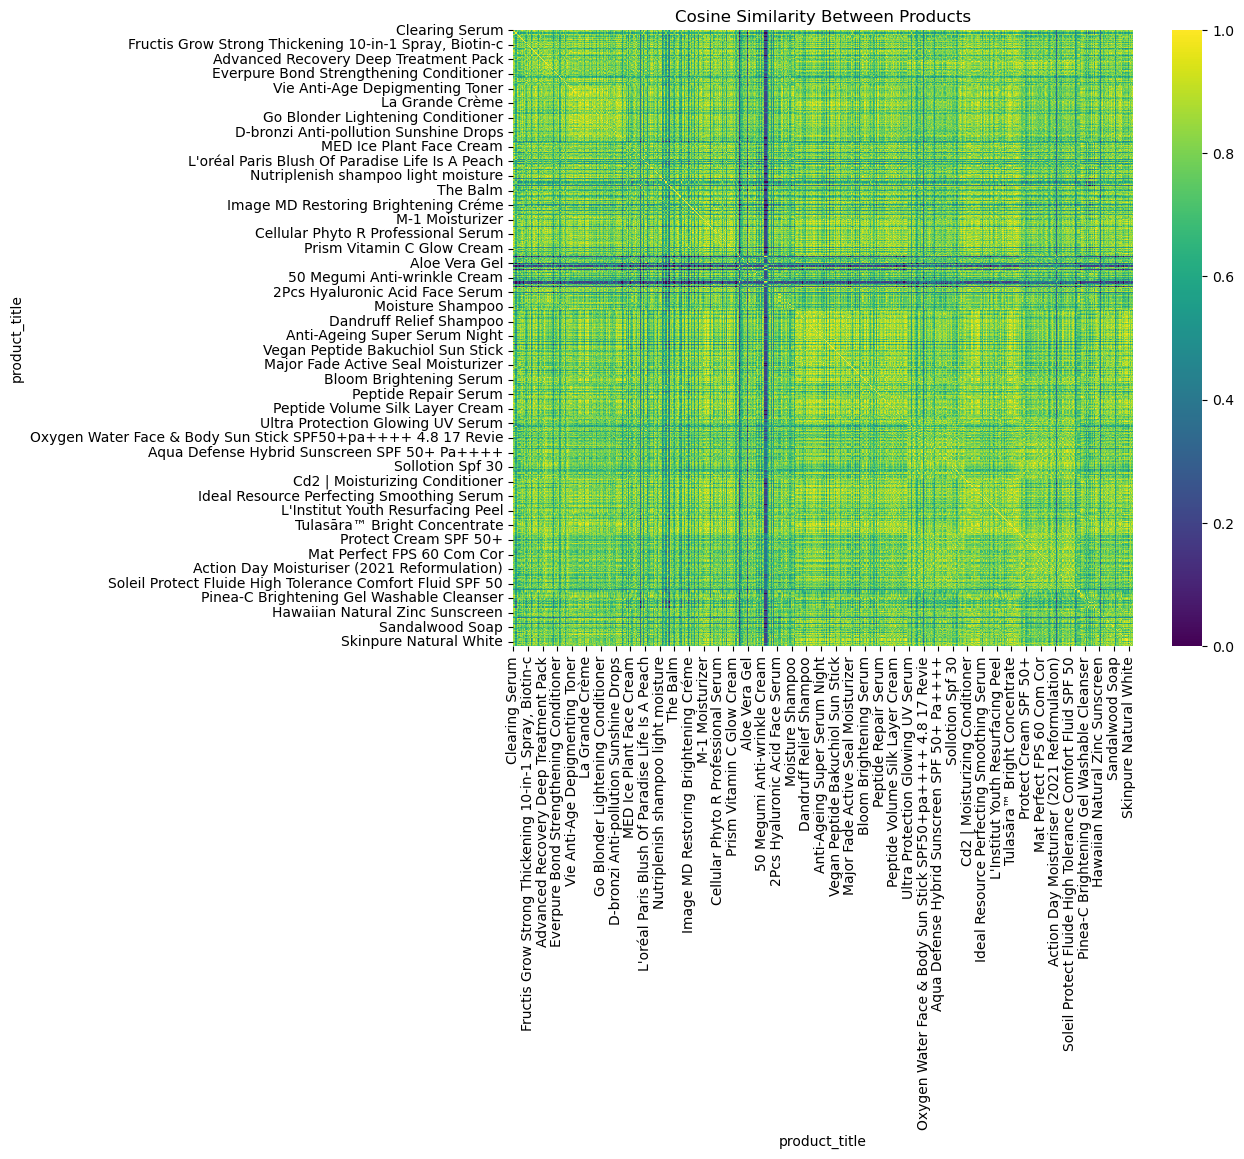

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarity_df, cmap='viridis')
plt.title("Cosine Similarity Between Products")
plt.show()


## DBSCAN clustering

In [7]:
# Count dataset
# Shows HOW MANY ingredients have each function
# It captures ingredient concentration effects
df_counts = pd.read_csv('skincare_dataset_counts.csv')


In [10]:
# Print info about dataset
print("\nCOUNTS DATASET:")
print(f"Columns ({len(df_counts.columns)}):")
print(df_counts.columns.tolist())
print("\nFirst row example:")
print(df_counts.iloc[0])


COUNTS DATASET:
Columns (28):
['product_brand', 'product_title', 'predicted_category', 'abrasive_scrub', 'absorbent_mattifier', 'anti-acne', 'antimicrobial_antibacterial', 'antioxidant', 'astringent', 'buffering', 'cell-communicating_ingredient', 'chelating', 'colorant', 'deodorant', 'emollient', 'emulsifying', 'emulsion_stabilising', 'exfoliant', 'moisturizer_humectant', 'perfuming', 'preservative', 'skin_brightening', 'skin-identical_ingredient', 'solvent', 'soothing', 'sunscreen', 'surfactant_cleansing', 'viscosity_controlling']

First row example:
product_brand                    The Skin Shark
product_title                    Clearing Serum
predicted_category                   Face Serum
abrasive_scrub                                0
absorbent_mattifier                           0
anti-acne                                     0
antimicrobial_antibacterial                   0
antioxidant                                   4
astringent                                    0
buffering

In [12]:
df_counts.head()

,product_brand,product_title,predicted_category,abrasive_scrub,absorbent_mattifier,anti-acne,antimicrobial_antibacterial,antioxidant,astringent,buffering,...,moisturizer_humectant,perfuming,preservative,skin_brightening,skin-identical_ingredient,solvent,soothing,sunscreen,surfactant_cleansing,viscosity_controlling
0,The Skin Shark,Clearing Serum,Face Serum,0,0,0,0,4,0,1,...,0,1,2,0,2,5,1,0,0,4
1,The Skin Shark,Spot Treatment,Acne Treatment,0,0,0,0,4,0,1,...,0,1,2,0,2,5,1,0,0,4
2,C9 Beauty,Face Cream,Face Moisturizer,0,0,0,0,12,0,0,...,0,4,4,0,8,4,2,0,0,4
3,Le-kku,CBD Day Cream,Face Moisturizer,0,0,0,0,3,0,1,...,0,0,2,0,3,1,1,0,0,2
4,Le-kku,CBD Face Serum,Face Serum,0,0,0,0,2,0,0,...,0,6,0,0,1,1,0,0,0,0


## Classification Models

In [13]:
# ML-ready dataset
df_ml = pd.read_csv('skincare_dataset_ml_ready.csv')
# Target: predicted_category
# Features: All function counts, safety scores, diversity metrics

In [14]:
df_ml.head()

,predicted_category,confidence,total_ingredients,abrasive_scrub,absorbent_mattifier,anti-acne,antimicrobial_antibacterial,antioxidant,astringent,buffering,...,goodie_percentage,icky_percentage,avg_irritancy,max_irritancy,avg_comedogenicity,max_comedogenicity,safety_concern_ingredients,function_diversity,total_functions,avg_functions_per_ingredient
0,Face Serum,0.95,30,0,0,0,0,4,0,1,...,0.166667,0.000000,0.000000,0,0.555556,3,1,12,32,1.066667
1,Acne Treatment,0.95,30,0,0,0,0,4,0,1,...,0.166667,0.000000,0.000000,0,0.555556,3,1,12,32,1.066667
2,Face Moisturizer,0.95,56,0,0,0,0,12,0,0,...,0.214286,0.035714,0.444444,3,1.444444,3,8,9,66,1.178571
3,Face Moisturizer,0.95,18,0,0,0,0,3,0,1,...,0.388889,0.000000,0.500000,3,1.375000,3,2,9,23,1.277778
4,Face Serum,0.95,11,0,0,0,0,2,0,0,...,0.272727,0.545455,1.000000,3,2.333333,3,3,5,12,1.090909


In [15]:
df_full = pd.read_csv('skincare_dataset_full.csv')

In [16]:
df_full.head()

,product_brand,product_title,predicted_category,confidence,total_ingredients,abrasive_scrub,absorbent_mattifier,anti-acne,antimicrobial_antibacterial,antioxidant,...,icky_percentage,avg_irritancy,max_irritancy,avg_comedogenicity,max_comedogenicity,safety_concern_ingredients,function_diversity,total_functions,avg_functions_per_ingredient,ingredient_names
0,The Skin Shark,Clearing Serum,Face Serum,0.95,30,0,0,0,0,4,...,0.000000,0.000000,0,0.555556,3,1,12,32,1.066667,"['Water', 'Propylene Glycol', 'Undecane', 'Cyc..."
1,The Skin Shark,Spot Treatment,Acne Treatment,0.95,30,0,0,0,0,4,...,0.000000,0.000000,0,0.555556,3,1,12,32,1.066667,"['Water', 'Propylene Glycol', 'Undecane', 'Cyc..."
2,C9 Beauty,Face Cream,Face Moisturizer,0.95,56,0,0,0,0,12,...,0.035714,0.444444,3,1.444444,3,8,9,66,1.178571,"['Aqua', 'Cetearyl Alcohol', 'Caprylic/Capric ..."
3,Le-kku,CBD Day Cream,Face Moisturizer,0.95,18,0,0,0,0,3,...,0.000000,0.500000,3,1.375000,3,2,9,23,1.277778,"['Aqua', 'Aloe Barbadensis Leaf Juice', 'Butyr..."
4,Le-kku,CBD Face Serum,Face Serum,0.95,11,0,0,0,0,2,...,0.545455,1.000000,3,2.333333,3,3,5,12,1.090909,"['Squalane', 'Prunus Amygdalus Dulcis Oil', 'C..."
